In [1]:
import pandas as pd
import numpy as np

In [8]:
pd.set_option('display.max_columns', None)
por2_df = pd.read_csv("data/por_data.csv")

In [9]:
por2_outcome = por2_df.iloc[:, -1:] # Only want the outcome of the final grade.
por2_data_ex = por2_df.iloc[:, :-3] # Only taking features that isn't the final grade or semester grades
por2_data_inc = por2_df.iloc[:, :-1] # Only taking features that isn't the final grade
por2_protected = por2_df.drop(columns = ['Sex', 'Age', 'Mother Education', 'Father Education', 'Mother Job', 'Father Job', 'Guardian', 'Parental Status'])

In [10]:
por2_protected

,School,Address,Family Size,Reason for School,Travel Time,Study Time,# of Failures,Extra Educational Support,Extra Family Support,Extra Paid Classes,Extracurricular,Nursery,Desire Higher Education,Internet Access,Romantic Relationship,Family Relationship Quality,Amount of Free Time,Frequency of Going Out,Weekday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Abscences,1st Period Grade,2nd Period Grade,Final Grade
0,GP,U,GT3,course,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,U,GT3,course,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,U,LE3,other,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,U,GT3,home,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,U,GT3,home,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,R,GT3,course,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,U,LE3,course,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,U,GT3,course,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,U,LE3,course,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [11]:
# Preprocessing of por2 data df to turn binary string values and categorial variables into integers
# Copying excluded and included datasets to keep original intact
no_yes_answer = {'no': 0,'yes': 1}
school_identity = {'GP': 0,'MS': 1} 
urban_rural = {'U': 0,'R': 1} 
family_size = {'LE3': 0,'GT3': 1} 
binary_categories = {
                     "Extra Educational Support": no_yes_answer,
                     "Extra Family Support": no_yes_answer,
                     "Extra Paid Classes": no_yes_answer,
                     "Extracurricular": no_yes_answer,
                     "Nursery": no_yes_answer,
                     "Desire Higher Education": no_yes_answer,
                     "Internet Access": no_yes_answer,
                     "Romantic Relationship": no_yes_answer,
                     "School": school_identity,
                     "Address": urban_rural,
                     "Family Size": family_size,
                    }

encode_por2_data_ex = por2_data_ex.copy()
encode_por2_data_inc = por2_data_inc.copy()

encode_por2_data_ex = encode_por2_data_ex.replace(binary_categories)
encode_por2_data_inc = encode_por2_data_inc.replace(binary_categories)

categorial_features = encode_por2_data_ex.select_dtypes(include=object).columns.tolist()
encode_por2_data_ex = pd.get_dummies(encode_por2_data_ex, columns=categorial_features)
encode_por2_data_inc = pd.get_dummies(encode_por2_data_inc, columns=categorial_features)

In [12]:
# Preprocessing of por outcome df to turn final grade values into a binary pass/no pass
# Making a copy of the df since we want to keep the original dataframe
def bin_conversion(outcomes):
    for i, score in enumerate(outcomes["Final Grade"]):
        if score > 9:
            outcomes.at[i] = 1
        else:
            outcomes.at[i] = 0
    
    return outcomes

bin_por2_outcome = por2_outcome.copy()
bin_por2_outcome = bin_conversion(bin_por2_outcome)

In [14]:
# Splitting one hot encoded data and binary por2 outcomes into train and test sets
# This cell is creation of train and test datasets that excludes semester grades
from sklearn.model_selection import train_test_split
por2_data_train_ex, por2_data_test_ex, por2_outcome_train_ex, por2_outcome_test_ex = train_test_split(encode_por2_data_ex, bin_por2_outcome, test_size=0.30,shuffle=True)
por2_data_train_ex, por2_data_test_ex, por2_outcome_train_ex, por2_outcome_test_ex = por2_data_train_ex.values, por2_data_test_ex.values, por2_outcome_train_ex.values.ravel(), por2_outcome_test_ex.values.ravel()

In [15]:
# This cell is creation of train and test datasets that includes semester grades
por2_data_train_inc, por2_data_test_inc, por2_outcome_train_inc, por2_outcome_test_inc = train_test_split(encode_por2_data_inc, bin_por2_outcome, test_size=0.30,shuffle=True)
por2_data_train_inc, por2_data_test_inc, por2_outcome_train_inc, por2_outcome_test_inc = por2_data_train_inc.values, por2_data_test_inc.values, por2_outcome_train_inc.values.ravel(), por2_outcome_test_inc.values.ravel()

In [16]:
def mean_squared_error(y, y_hat):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(y, y_hat)

In [17]:
def correct_percentage(y, y_hat):
    n = len(y)
    accuracyList = []
    for i in range(n):
        if y[i] == y_hat[i]:
            accuracyList.append(1)
        else:
            accuracyList.append(0)
            
    return (sum(accuracyList) / n) * 100

In [18]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [19]:
# Using four different machine learning models on data
# 1. Decision Tree
# 2. Random Forest
# 3. Ridge Regression
# 4. Neural Net
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
dt = tree.DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(max_depth=5)
ridgereg = linear_model.Ridge()
neurnet = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
scaler = StandardScaler()

In [20]:
# Next few cells will be fitting and prediciting the models on the exlucded dataset
# Decision tree model
dt.fit(por2_data_train_ex, por2_outcome_train_ex)
dt_yhat = dt.predict(por2_data_test_ex)
dt_per_binex = correct_percentage(por2_outcome_test_ex, dt_yhat)

In [21]:
# Random forest model
rf.fit(por2_data_train_ex, por2_outcome_train_ex)
rf_yhat = rf.predict(por2_data_test_ex)
rf_per_binex = correct_percentage(por2_outcome_test_ex, rf_yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
# Ridge regression model
ridgereg.fit(por2_data_train_ex, por2_outcome_train_ex)
ridgereg_yhat = ridgereg.predict(por2_data_test_ex)
ridgereg_per_binex = correct_percentage(por2_outcome_test_ex, np.round(ridgereg_yhat))

In [23]:
# Neural network model, input data needs to be scaled in order to fit data
scaler.fit(por2_data_train_ex)
por2_data_train_scaled = scaler.transform(por2_data_train_ex)
por2_data_test_scaled = scaler.transform(por2_data_test_ex)
neurnet.fit(por2_data_train_scaled, por2_outcome_train_ex)
neurnet_yhat = neurnet.predict(por2_data_test_scaled)
neurnet_per_binex = correct_percentage(por2_outcome_test_ex, neurnet_yhat)

In [24]:
# Next few cells will be fitting and prediciting the models on the included dataset
# Decision tree model
dt.fit(por2_data_train_inc, por2_outcome_train_inc)
dt_yhat = dt.predict(por2_data_test_inc)
dt_per_bininc = correct_percentage(por2_outcome_test_inc, dt_yhat)

In [25]:
# Random forest model
rf.fit(por2_data_train_inc, por2_outcome_train_inc)
rf_yhat = rf.predict(por2_data_test_inc)
rf_per_bininc = correct_percentage(por2_outcome_test_inc, rf_yhat)

In [26]:
# Ridge regression model
ridgereg.fit(por2_data_train_inc, por2_outcome_train_inc)
ridgereg_yhat = ridgereg.predict(por2_data_test_inc)
ridgereg_per_bininc = correct_percentage(por2_outcome_test_inc, np.round(ridgereg_yhat))

In [27]:
# Neural network model, input data needs to be scaled in order to fit data
scaler.fit(por2_data_train_inc)
por2_data_train_scaled = scaler.transform(por2_data_train_inc)
por2_data_test_scaled = scaler.transform(por2_data_test_inc)
neurnet.fit(por2_data_train_scaled, por2_outcome_train_inc)
neurnet_yhat = neurnet.predict(por2_data_test_scaled)
neurnet_per_bininc = correct_percentage(por2_outcome_test_inc, neurnet_yhat)

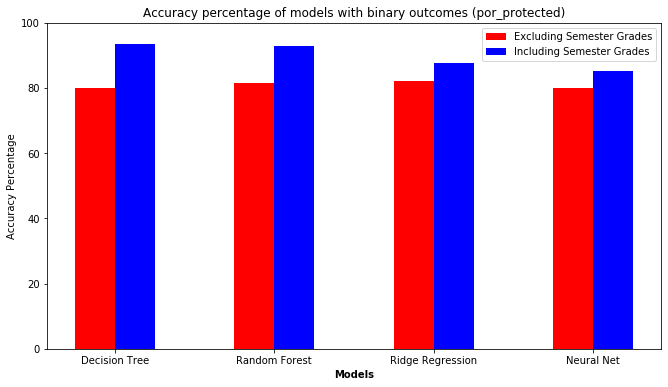

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
bin_ex_percentages = np.round([dt_per_binex, rf_per_binex, ridgereg_per_binex, neurnet_per_binex], 2)
bin_inc_percentages= np.round([dt_per_bininc, rf_per_bininc, ridgereg_per_bininc, neurnet_per_bininc], 2)
x_labels = ["Decision Tree", "Random Forest", "Ridge Regression", "Neural Net"]

barWidth = 0.25

x = np.arange(len(x_labels))
plt.xticks(x, x_labels)

r1 = plt.bar(x - barWidth/2, bin_ex_percentages, width=barWidth, color="red", label="Excluding Semester Grades")
r2 = plt.bar(x + barWidth/2, bin_inc_percentages, width=barWidth, color="blue", label="Including Semester Grades")

plt.ylabel("Accuracy Percentage")
plt.xlabel("Models", fontweight="bold")
plt.ylim(top=100, bottom=0)
plt.title("Accuracy percentage of models with binary outcomes (por_protected)")
plt.legend()
plt.savefig('por_protected.png')
plt.show()

In [30]:
print(bin_ex_percentages)
print(bin_inc_percentages)

[80.   81.54 82.05 80.  ]
[93.33 92.82 87.69 85.13]


<Figure size 432x288 with 0 Axes>